In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor




#### **Load Data & Basic Info**

In [22]:
# Load CSV
df = pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\kamis_maize_prices.csv")

# Basic overview
print(df.head())




  Commodity_Classification  Commodity Classification   County  \
0          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
1          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
2          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
3          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
4          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   

            Market       Date  Year  Month Year_Month  WeekofYear Year_Week  \
0   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
1  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
2  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
3   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
4   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   

   SupplyVolume  Retail  Wholesale Unit  
0       14000.0    30.0      27.00   Kg  
1        2000.0    40.0      22.22   Kg  
2       

#### **Data information and description**

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21888 entries, 0 to 21887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Commodity_Classification  21888 non-null  object 
 1   Commodity                 21888 non-null  object 
 2   Classification            21888 non-null  object 
 3   County                    21888 non-null  object 
 4   Market                    21888 non-null  object 
 5   Date                      21888 non-null  object 
 6   Year                      21888 non-null  int64  
 7   Month                     21888 non-null  int64  
 8   Year_Month                21888 non-null  object 
 9   WeekofYear                21888 non-null  int64  
 10  Year_Week                 21888 non-null  object 
 11  SupplyVolume              17382 non-null  float64
 12  Retail                    21016 non-null  float64
 13  Wholesale                 20203 non-null  float64
 14  Unit  

##### **Convert Dates**

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekofYear'] = df['Date'].dt.isocalendar().week


NameError: name 'df' is not defined

In [ ]:
print(df.describe())

                                Date          Year         Month  WeekofYear  \
count                          21888  21888.000000  21888.000000     21888.0   
mean   2022-11-12 09:07:06.315789568   2022.362482      6.536230   26.628609   
min              2021-05-24 00:00:00   2021.000000      1.000000         1.0   
25%              2021-12-29 00:00:00   2021.000000      4.000000        17.0   
50%              2022-10-09 00:00:00   2022.000000      6.000000        26.0   
75%              2023-07-12 00:00:00   2023.000000      9.000000        38.0   
max              2025-07-31 00:00:00   2025.000000     12.000000        52.0   
std                              NaN      1.088241      3.123253    13.47537   

       SupplyVolume        Retail     Wholesale  
count  1.738200e+04  21016.000000  20203.000000  
mean   2.658967e+04     62.201108     50.883522  
min    0.000000e+00      6.390000      0.020000  
25%    1.625000e+03     40.000000     34.440000  
50%    4.600000e+03     60.00

##### **Categorical Exploration**

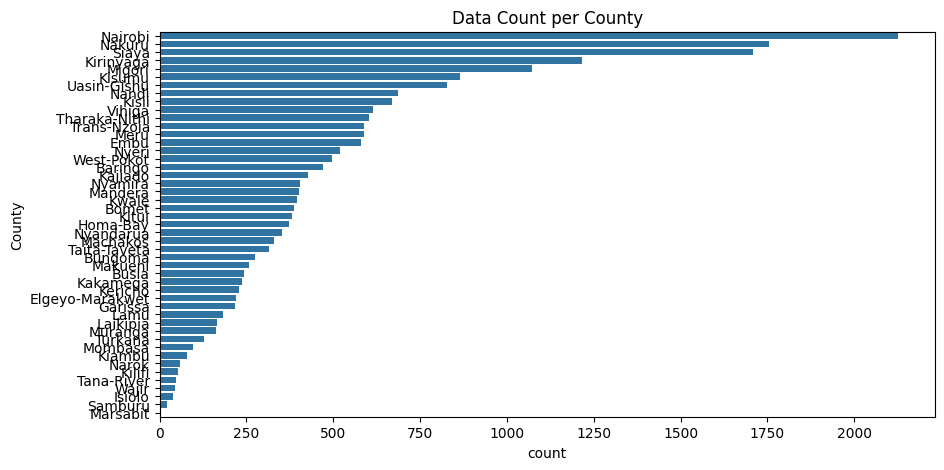

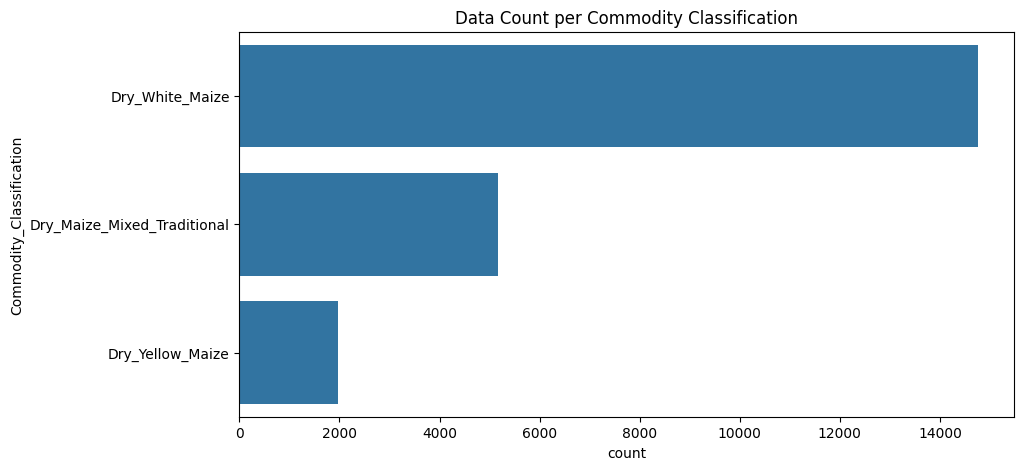

In [ ]:
# Count plots
plt.figure(figsize=(10,5))
sns.countplot(y='County', data=df, order=df['County'].value_counts().index)
plt.title("Data Count per County")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='Commodity_Classification', data=df)
plt.title("Data Count per Commodity Classification")
plt.show()


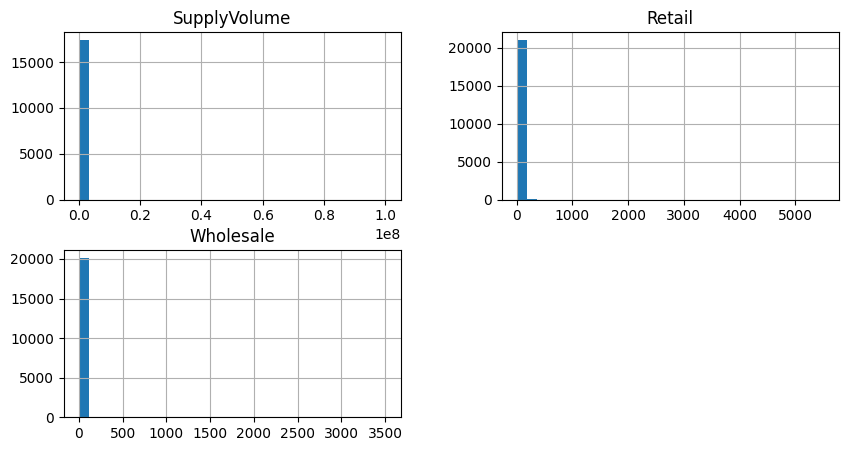

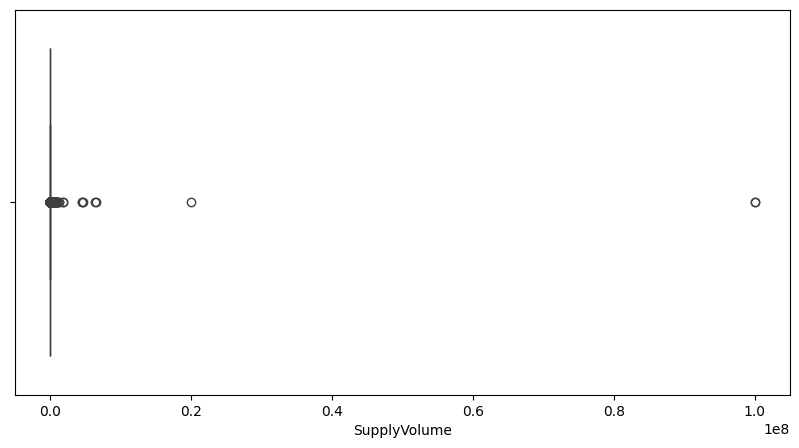

In [ ]:
# Histograms
df[['SupplyVolume', 'Retail', 'Wholesale']].hist(bins=30, figsize=(10,5))
plt.show()

# Boxplots for outliers
plt.figure(figsize=(10,5))
sns.boxplot(x='SupplyVolume', data=df)
plt.show()


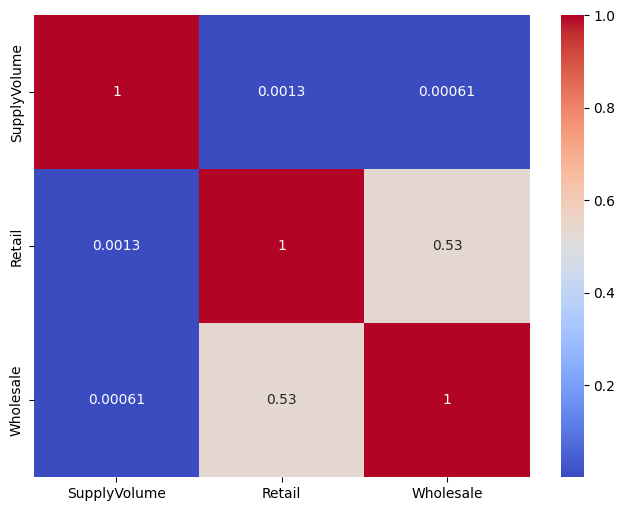

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['SupplyVolume', 'Retail', 'Wholesale']].corr(), annot=True, cmap='coolwarm')
plt.show()


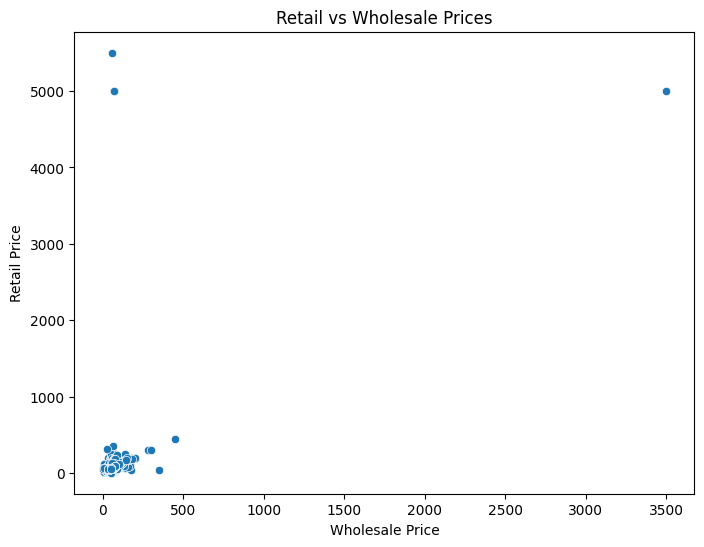

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale', y='Retail', data=df)
plt.title('Retail vs Wholesale Prices')
plt.xlabel('Wholesale Price')
plt.ylabel('Retail Price')
plt.show()


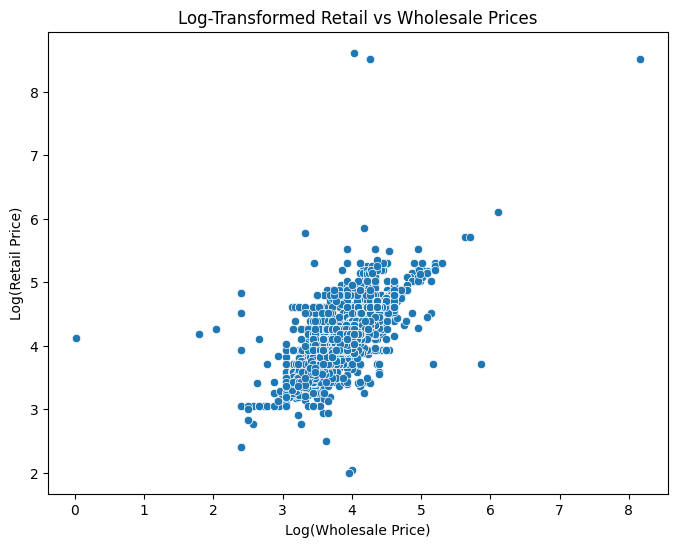

In [ ]:

# Apply log transformation (add small constant to avoid log(0))
df['Wholesale_log'] = np.log1p(df['Wholesale'])
df['Retail_log'] = np.log1p(df['Retail'])

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale_log', y='Retail_log', data=df)
plt.title('Log-Transformed Retail vs Wholesale Prices')
plt.xlabel('Log(Wholesale Price)')
plt.ylabel('Log(Retail Price)')
plt.show()


In [ ]:
print(df[["Retail_log","Wholesale_log"]].corr())

               Retail_log  Wholesale_log
Retail_log       1.000000       0.883759
Wholesale_log    0.883759       1.000000


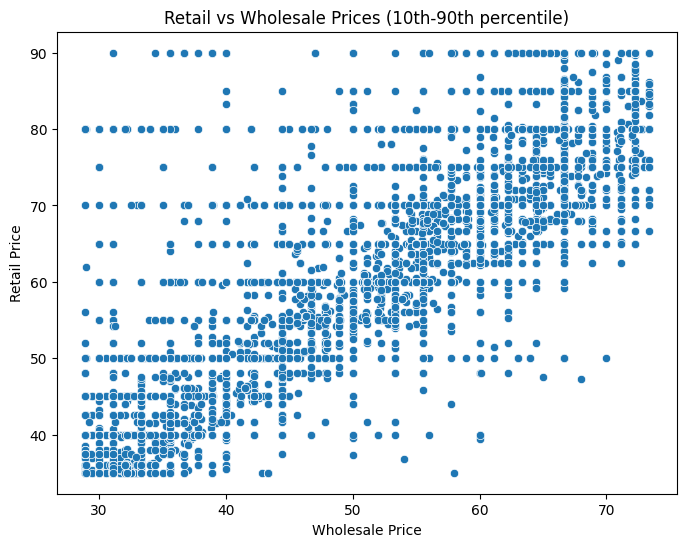

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute 10th and 90th percentiles
lower_wholesale = df['Wholesale'].quantile(0.1)
upper_wholesale = df['Wholesale'].quantile(0.9)

lower_retail = df['Retail'].quantile(0.1)
upper_retail = df['Retail'].quantile(0.9)

# Filter data between 0.1 and 0.9 quantiles
df_filtered = df[
    (df['Wholesale'] >= lower_wholesale) & (df['Wholesale'] <= upper_wholesale) &
    (df['Retail'] >= lower_retail) & (df['Retail'] <= upper_retail)
]

# Plot scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale', y='Retail', data=df_filtered)
plt.title('Retail vs Wholesale Prices (10th-90th percentile)')
plt.xlabel('Wholesale Price')
plt.ylabel('Retail Price')
plt.show()


##### **Box-Cox Transformation**

##### **Quantile Transformation / Rank-Based Scaling**

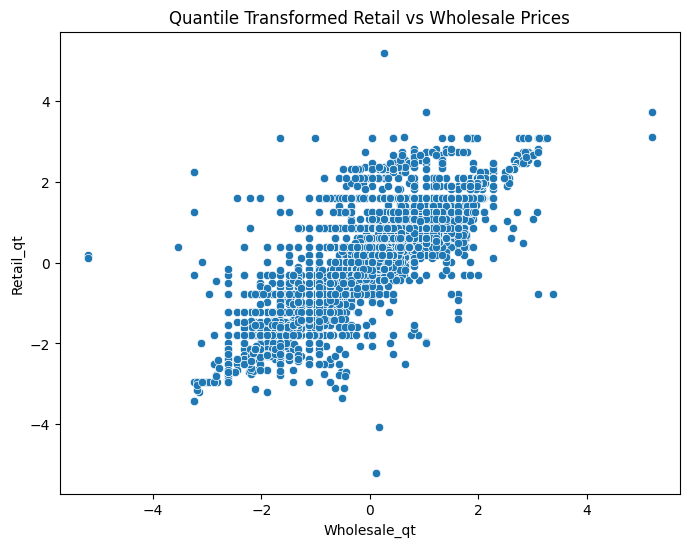

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df[['Wholesale_qt', 'Retail_qt']] = qt.fit_transform(df[['Wholesale', 'Retail']])

plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale_qt', y='Retail_qt', data=df)
plt.title('Quantile Transformed Retail vs Wholesale Prices')
plt.show()


In [ ]:
print(df[['Wholesale_qt', 'Retail_qt']].corr())

              Wholesale_qt  Retail_qt
Wholesale_qt      1.000000   0.881571
Retail_qt         0.881571   1.000000


##### **Time Series Insights**

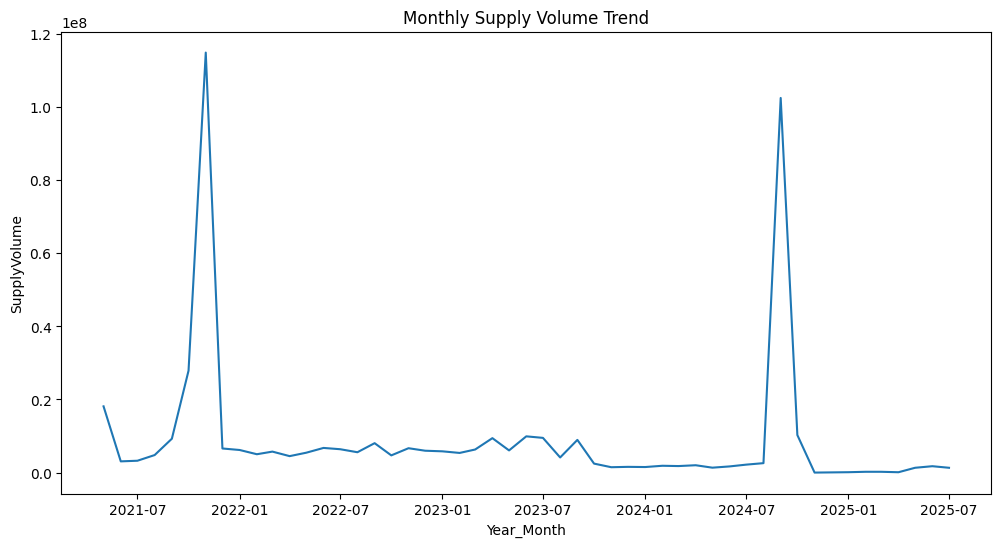

In [ ]:
# Monthly SupplyVolume trend
monthly = df.groupby('Year_Month')['SupplyVolume'].sum().reset_index()
monthly['Year_Month'] = pd.to_datetime(monthly['Year_Month'])
plt.figure(figsize=(12,6))
sns.lineplot(x='Year_Month', y='SupplyVolume', data=monthly)
plt.title("Monthly Supply Volume Trend")
plt.show()


#### **Data cleaning** 

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
for col in df.columns:
    missing_pct = (df[col].isnull().sum() / df.shape[0]) * 100
    print(f"{col}: {missing_pct:.2f}% missing")


Commodity_Classification: 0.00% missing
Commodity: 0.00% missing
Classification: 0.00% missing
County: 0.00% missing
Market: 0.00% missing
Date: 0.00% missing
Year: 0.00% missing
Month: 0.00% missing
Year_Month: 0.00% missing
WeekofYear: 0.00% missing
Year_Week: 0.00% missing
SupplyVolume: 20.59% missing
Retail: 3.98% missing
Wholesale: 7.70% missing
Unit: 0.00% missing


In [ ]:
print(df.value_counts())

Commodity_Classification     Commodity  Classification     County    Market                     Date        Year  Month  Year_Month  WeekofYear  Year_Week  SupplyVolume  Retail  Wholesale  Unit
Dry_White_Maize              Dry_Maize  White_Maize        Migori    Mabera_Market              2021-05-24  2021  5      2021-05     21          2021-21    900.0         30.0    22.50      Kg      12
Dry_Maize_Mixed_Traditional  Dry_Maize  Mixed_Traditional  Garissa   Garissa_Soko_Mugdi_Market  2021-05-24  2021  5      2021-05     21          2021-21    10000.0       80.0    60.00      Kg      12
Dry_Yellow_Maize             Dry_Maize  Yellow_Maize       Kisii     Daraja_Mbili_Market        2021-05-24  2021  5      2021-05     21          2021-21    2000.0        40.0    26.67      Kg      10
Dry_White_Maize              Dry_Maize  White_Maize        Baringo   Marigat_Market             2021-05-24  2021  5      2021-05     21          2021-21    14000.0       30.0    27.00      Kg       9
Dry_Ma

In [ ]:
# Load CSV
df2= pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\kamis_maize_prices_raw.csv")

# Basic overview
df2.shape

(22525, 16)

In [ ]:
# Load CSV
df_agribora = pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\agribora_maize_prices.csv")

# Basic overview
df_agribora.shape

(808, 6)

In [19]:
df.shape[0]+df2.shape[0]+df_agribora.shape[0]

NameError: name 'df' is not defined